# Study simulated data

In [2]:
%matplotlib inline
import pickle
plt.rc('font', size=12)
os.chdir('/nfs/farm/g/glast/u/burnett/analysis/agn')

In [23]:
filename = 'simulated_data.pkl'
time_data = pickle.load( open(filename,))
print 'read {} photons from file {}'.format(len(time_data), filename)

read 202 photons from file simulated_data.pkl


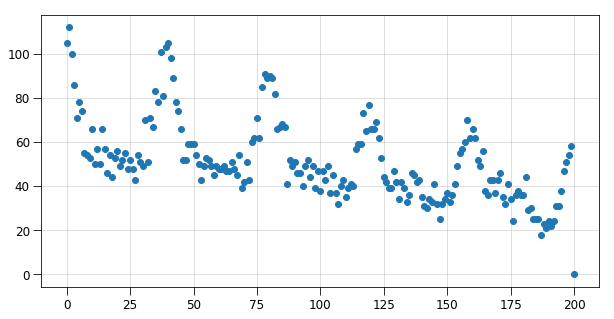

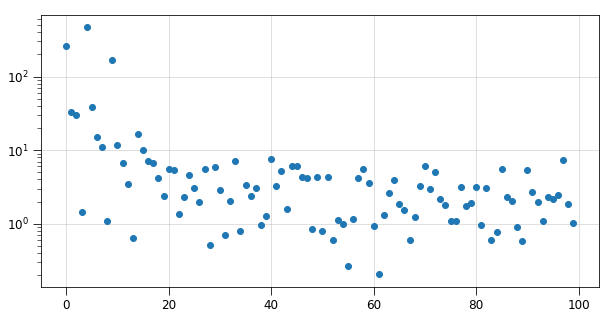

In [31]:
weights = np.ones(len(time_data)) # no weights for now 
window_size, max_freq = (500, 0.2)
fft_size = 2 * int(np.floor(window_size * max_freq))
time_resol = .5 / max_freq


td = np.zeros(fft_size+1)
for i1,t1 in enumerate(time_data):
    b = np.searchsorted(time_data, ( t1+window_size))
    t2 = time_data[i1+1:b]
    fb = np.floor((t2-t1)/time_resol).astype(int)
    td[fb] += weights[i1]*weights[i1+1:b]
    
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(td, 'o');
ax.grid(alpha=0.5);

time_differences = td
norm = np.sum(np.absolute(time_differences)/2.0, dtype=np.float32)
output_array = np.fft.rfft(time_differences)
power =np.square(np.absolute(output_array)) / norm

fig,ax = plt.subplots(figsize=(10,5))
ax.semilogy(power[1:], 'o');
ax.grid(alpha=0.5);